# CS109b Final Project EDA (Milestone 2)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

### Load data

In [2]:
df = pd.read_csv("./../Data/airpred_clean.csv")
df.shape

(21560, 117)

### Quick EDA

The dataset contains 21,560 observations for 117 variables. The data were collected between January 1, 2012 and January 10, 2012 at 2,156 sites, with 10 readings at each site (one reading per day). The 117 variables collected for each site include air pollutant measurements (such as levels of PM2.5, Ozone, and NO2), land use variables (such as road density, restaurant density, and the coverage of tree canopy, shrubland, water, wetlands, developed land, and barren land), surface level meteorological variables (such as precipitation rate, accumulated snow, air temperature, visibility, and soil moisture content), measurements from NASA satellites (such as aerosol products, surface reflectance, Land Surface, and Temperature and Emissivity), and measurements from areas nearby (PM2.5, Ozone, NO2, and temperature of nearby areas).

!!!!! add Eric's code to notebook


In [3]:
df.head()

Unnamed: 0  site  year        date  MonitorData  GFEDFireCarbon  \
0           1     1  2012  2012-01-01     0.416935        0.000000   
1           2     2  2012  2012-01-01     0.442172        0.000359   
2           3     3  2012  2012-01-01     0.406011        0.000000   
3           4     4  2012  2012-01-01     0.432947        0.000000   
4           5     5  2012  2012-01-01     0.488368        0.000155   

   USElevation_dsc10000  USElevation_max100  USElevation_max10000  \
0              0.018435            0.021178              0.018696   
1              0.109451            0.104439              0.109926   
2              0.057965            0.058312              0.058324   
3              0.106229            0.110241              0.106653   
4              0.061795            0.062083              0.063172   

   USElevation_mea100  USElevation_mea10000  USElevation_med100  \
0            0.019602              0.018626            0.019591   
1            0.103569              0.109700            0.103509   
2            0.057343              0.058225            0.057310   
3            0.109421              0.106490            0.109357   
4            0.060269              0.062044            0.060234   

   USElevation_med10000  USElevation_min100  USElevation_min10000  \
0              0.018642            0.019515              0.018631   
1              0.109687            0.104080              0.109618   
2              0.058221            0.055884              0.058251   
3              0.106492            0.110290              0.106409   
4              0.062002            0.057363              0.061245   

   USElevation_std100  USElevation_std10000  USElevation_bln100  \
0            0.024390              0.053644            0.019846   
1            0.048780              0.136850            0.104265   
2            0.097561              0.086542            0.059538   
3            0.048780              0.126846            0.109893   
4            0.170732              0.136461            0.054799   

   USElevation_bln10000  NLCD_Barren100  NLCD_Barren10000  NLCD_Developed100  \
0              0.018741             0.0          0.010422           0.111111   
1              0.110166             0.0          0.010422           0.000000   
2              0.058599             0.0          0.003417           0.000000   
3              0.107468             0.0          0.001025           0.000000   
4              0.062720             0.0          0.002734           0.111111   

   NLCD_Developed10000  NLCD_Herbaceous100  NLCD_Herbaceous10000  \
0             0.086789                 0.0              0.056136   
1             0.023897                 1.0              0.097922   
2             0.234445                 0.0              0.014579   
3             0.018862                 0.0              0.014924   
4             0.275059                 0.0              0.012169   

   NLCD_Planted100  NLCD_Planted10000  NLCD_Shrubland100  NLCD_Shrubland10000  \
0              0.0           0.338143                0.0             0.040721   
1              0.0           0.218920                0.0             0.052428   
2              1.0           0.240725                0.0             0.042960   
3              1.0           0.602191                0.0             0.034918   
4              0.0           0.082664                0.0             0.019953   

   NLCD_Water100  NLCD_Water10000  NLCD_Wetlands100  NLCD_Wetlands10000  \
0            0.0         0.173497               0.0            0.133716   
1            0.0         0.010860               0.0            0.009663   
2            0.0         0.102004               0.0            0.074432   
3            0.0         0.002715               0.0            0.006399   
4            0.0         0.091661               0.0            0.031209   

   NLCD_Impervious100  NLCD_Impervious10000  RoadDensity_primaryroads1000  \
0                0.01              0.0810

In [68]:
print('original data, shape:', df.shape)
print('number of sites represented in dataset: ', len(df.site.unique()))
print('dates of data collection and number of observations per date: ')
df.date.value_counts()

original data, shape: (21560, 117)
number of sites represented in dataset:  2156
dates of data collection and number of observations per date: 


2012-01-09    2156
2012-01-05    2156
2012-01-07    2156
2012-01-02    2156
2012-01-10    2156
2012-01-06    2156
2012-01-01    2156
2012-01-04    2156
2012-01-08    2156
2012-01-03    2156
Name: date, dtype: int64

In [80]:
#calculate average and number of null values for each variable
summary = pd.DataFrame(df.mean(axis = 0), columns = ['Mean'])
summary['Null Values'] = df.isnull().sum(axis=0)
summary.sort_values(by = 'Null Values', axis=0, ascending = False)

Mean  Null Values
REANALYSIS_windspeed_10m_1Day                            NaN        21560
MonitorData                                         0.425611        16199
RoadDensity_prisecroads10000                        0.262634          300
RoadDensity_prisecroads1000                         0.146372          300
RoadDensity_roads1000                               0.257380          270
USElevation_min100                                  0.134813           50
USElevation_bln100                                  0.136110           40
USElevation_mea100                                  0.134627           40
NLCD_Wetlands100                                    0.014399           30
NLCD_Water100                                       0.006967           30
NLCD_Shrubland100                                   0.050163           30
NLCD_Planted100                                     0.085462           30
NLCD_Herbaceous100                                  0.043196           30
NLCD_Barren100                                      0.002322           30
NLCD_Developed100                                   0.420860           30
USElevation_med100                                  0.134499           30
REANALYSIS_evap_DailyMean                           0.206777           20
REANALYSIS_shum_2m_DailyMax                         0.255497           20
REANALYSIS_shum_2m_1Day                             0.223159           20
REANALYSIS_windspeed_10m_DailyMean                  0.156771           20
REANALYSIS_tcdc_DailyMean                           0.337726           20
REANALYSIS_vis_DailyMean                            0.907547           20
REANALYSIS_hpbl_1Day                                0.188944           20
REANALYSIS_vis_DailyMin                             0.748845           20
REANALYSIS_prate_DailyMin                           0.008517           20
REANALYSIS_windspeed_10m_DailyMin                   0.140193           20
REANALYSIS_hpbl_DailyMax                            0.207821           20
REANALYSIS_snowc_DailyMean                          0.037777           20
REANALYSIS_shum_2m_DailyMean                        0.221288           20
REANALYSIS_shum_2m_DailyMin                         0.196411           20
REANALYSIS_windspeed_10m_DailyMax                   0.201939           20
REANALYSIS_shtfl_DailyMean                          0.725660           20
REANALYSIS_prate_DailyMax                           0.009692           20
REANALYSIS_vis_DailyMax                             0.987914           20
REANALYSIS_lhtfl_DailyMean                          0.793212           20
REANALYSIS_apcp_DailyMean                           0.006435           20
REANALYSIS_prate_1Day                               0.007351           20
REANALYSIS_dlwrf_DailyMean                          0.455976           20
REANALYSIS_hpbl_DailyMin                            0.127248           20
REANALYSIS_dswrf_DailyMean                          0.426704           20
REANALYSIS_hpbl_DailyMean                           0.182189           20
REANALYSIS_weasd_DailyMean                          0.015152           20
REANALYSIS_vis_1Day                                 0.901223           20
USElevation_bln10000                                0.142060           20
REANALYSIS_air_sfc_DailyMean                        0.663880           20
REANALYSIS_air_sfc_DailyMax                         0.628461           20
REANALYSIS_prate_DailyMean                          0.008047           20
USElevation_dsc10000                                0.141622           20
USElevation_max100                                  0.135007           20
USElevation_max10000                                0.141626           20
USElevation_mea10000                                0.141842           20
USElevation_med10000                                0.141843           20
USElevation_min10000                                0.142196           20
USElevation_std100                                  0.075628

### Clean data

To clean the data, we first removed columns that provide little information (Unnamed: 0, a column of row numbers, and year, which is 2012 for all observations). Next, we removed columns with many NA values (REANALYSIS_windspeed_10m_1Day, MonitorData, RoadDensity_prisecroads10000, RoadDensity_prisecroads1000, and RoadDensity_roads1000, which had NA values for 21560, 16199, 300, 300, and 270 observations, respectively). Then, we removed the remaining rows with NA values, dropping 130 rows. Lastly, we converted the date column to the day in January 2012 so that its values are more suitable for analyses and modeling without losing any information. The cleaned data set contains 21430 observations for 110 variables. These measurements cover 2143 sites, with 10 measurements for each site, one for each day between January 1, 2012 and January 10, 2012. Following analyses are performed using the cleaned dataset.

In [4]:
#check NA values
df.isnull().sum(axis = 0).sort_values(ascending=False)

REANALYSIS_windspeed_10m_1Day                     21560
MonitorData                                       16199
RoadDensity_prisecroads10000                        300
RoadDensity_prisecroads1000                         300
RoadDensity_roads1000                               270
USElevation_min100                                   50
USElevation_mea100                                   40
USElevation_bln100                                   40
NLCD_Barren100                                       30
NLCD_Planted100                                      30
NLCD_Developed100                                    30
NLCD_Shrubland100                                    30
NLCD_Water100                                        30
NLCD_Wetlands100                                     30
USElevation_med100                                   30
NLCD_Herbaceous100                                   30
REANALYSIS_prate_DailyMean                           20
REANALYSIS_weasd_DailyMean                      

In [5]:
#####remove NAs

#drop columns
cols = list(df.columns)
cols.remove('Unnamed: 0') #just a column of integers 1-21560
cols.remove('REANALYSIS_windspeed_10m_1Day') #21560 NA values (all NA values)
cols.remove('MonitorData') #16199 NA values
cols.remove('RoadDensity_prisecroads10000') #300 NA values
cols.remove('RoadDensity_prisecroads1000') #300 NA values
cols.remove('RoadDensity_roads1000') #270 NA values
cols.remove('year') #2012 for all rows
data = df[cols]

#drop remaining rows with NA values --- 130 rows
data = data.dropna()

#check
print('shape, original data:', df.shape)
print('shape, cleaned data:', data.shape)
print('number of NA values, cleaned data:', data.isnull().sum(axis = 0).sum()) #should be 0
print('number of sites values, cleaned data:', len(data.site.value_counts()))
print('number of observations per site, cleaned data:', data.site.value_counts().value_counts().index[0])

#####convert date to day in Jan2012
data['date'] = pd.to_datetime(data['date']).dt.day
#data['date'].value_counts() #check that there are 2143 (# of sites) observations for each day

shape, original data: (21560, 117)
shape, cleaned data: (21430, 110)
number of NA values, cleaned data: 0
number of sites values, cleaned data: 2143
number of observations per site, cleaned data: 10


### Examine all variables

Aside from ```site``` and ```date```, all the variables in the dataset are continuous, numerical variables. The variables can be classified into the categories shown below. In addition, summary statistics of each variable are shown below. To quickly examine the pairwise relationships between each variable, we calculated and visualized the correlation matrix. The correlation matrix indicates that some variables, such as ```REANALYSIS_air_sfc_DailyMax``` and ```OMTO3e_ColumnAmountO3``` (correlation = -0.71), ```USElevation_mea100``` and ```USElevation_bln10000``` (correlation = 0.99), or ```USElevation_bln100``` and ```USElevation_dsc10000``` (correlation = 0.99), are strongly correlated, indicating potential issues of multicollinearity among the predictors.

**Variable categories:**

**Data collection information**
- site
- date

**GFED forest fire**
- GFEDFireCarbon

**Land use**
- USElevation_dsc10000
- USElevation_max100
- USElevation_max10000
- USElevation_mea100
- USElevation_mea10000
- USElevation_med100
- USElevation_med10000
- USElevation_min100
- USElevation_min10000
- USElevation_std100
- USElevation_std10000
- USElevation_bln100
- USElevation_bln10000
- NLCD_Barren100
- NLCD_Barren10000
- NLCD_Developed100
- NLCD_Developed10000
- NLCD_Herbaceous100
- NLCD_Herbaceous10000
- NLCD_Planted100
- NLCD_Planted10000
- NLCD_Shrubland100
- NLCD_Shrubland10000
- NLCD_Water100
- NLCD_Water10000
- NLCD_Wetlands100
- NLCD_Wetlands10000
- NLCD_Impervious100
- NLCD_Impervious10000
- RoadDensity_primaryroads1000
- RoadDensity_primaryroads10000
- Business_Restaurant1000

**Pollutants**
- PM25_Region
- Ozone_Region
- NO2_Region

**MAIAC AOD**
- MAIACUS_Optical_Depth_047_Aqua_Nearest4
- MAIACUS_Optical_Depth_055_Aqua_Nearest4
- MAIACUS_Optical_Depth_047_Terra_Nearest4
- MAIACUS_Optical_Depth_055_Terra_Nearest4
- MAIACUS_cosVZA_Aqua_Nearest
- MAIACUS_cosVZA_Terra_Nearest

**Surface Level Meteorological Variables**
- REANALYSIS_hpbl_DailyMax
- REANALYSIS_shum_2m_DailyMax
- REANALYSIS_windspeed_10m_DailyMax
- REANALYSIS_prate_DailyMax
- REANALYSIS_vis_DailyMax
- REANALYSIS_apcp_DailyMean
- REANALYSIS_dlwrf_DailyMean
- REANALYSIS_dswrf_DailyMean
- REANALYSIS_evap_DailyMean
- REANALYSIS_hpbl_DailyMean
- REANALYSIS_gflux_DailyMean
- REANALYSIS_lhtfl_DailyMean
- REANALYSIS_shtfl_DailyMean
- REANALYSIS_shum_2m_DailyMean
- REANALYSIS_snowc_DailyMean
- REANALYSIS_soilm_DailyMean
- REANALYSIS_tcdc_DailyMean
- REANALYSIS_windspeed_10m_DailyMean
- REANALYSIS_weasd_DailyMean
- REANALYSIS_prate_DailyMean
- REANALYSIS_vis_DailyMean
- REANALYSIS_hpbl_DailyMin
- REANALYSIS_shum_2m_DailyMin
- REANALYSIS_windspeed_10m_DailyMin
- REANALYSIS_prate_DailyMin
- REANALYSIS_vis_DailyMin
- REANALYSIS_hpbl_1Day
- REANALYSIS_shum_2m_1Day
- REANALYSIS_prate_1Day
- REANALYSIS_vis_1Day
- REANALYSIS_air_sfc_DailyMin
- REANALYSIS_air_sfc_DailyMean
- REANALYSIS_air_sfc_DailyMax

**Measurements from NASA satellites**

MOD04 - NASA aerosol products --- https://modis.gsfc.nasa.gov/data/dataprod/mod04.php

MOD09A1 - NASA surface reflectance --- https://modis.gsfc.nasa.gov/data/dataprod/mod09.php

MOD11A1 - NASA Land Surface Temperature and Emissivity --- https://modis.gsfc.nasa.gov/data/dataprod/mod11.php

MOD13A2 - NASA Vegetation Index Products --- https://modis.gsfc.nasa.gov/data/dataprod/mod13.php
- MOD04L2_550
- MOD09A1
- MOD11A1_LST_Day_1km_Nearest4
- MOD11A1_LST_Night_1km_Nearest4
- MOD11A1_Clear_day_cov_Nearest4
- MOD11A1_Clear_night_cov_Nearest4
- MOD13A2_Nearest4

**Nearby monitoring data**
- Nearby_Peak2_NO2
- Nearby_Peak2_PM25
- Nearby_Peak2_Ozone
- Nearby_Peak2Lag1_NO2
- Nearby_Peak2Lag1_PM25
- Nearby_Peak2Lag1_Ozone
- Nearby_Peak2Lag3_NO2
- Nearby_Peak2Lag3_PM25
- Nearby_Peak2Lag3_Ozone
- Nearby_Peak2_MaxTemperature
- Nearby_Peak2_MeanTemperature
- Nearby_Peak2_MinTemperature
- Nearby_Peak2Lag1_MaxTemperature
- Nearby_Peak2Lag1_MeanTemperature
- Nearby_Peak2Lag1_MinTemperature
- Nearby_Peak2Lag3_MaxTemperature
- Nearby_Peak2Lag3_MeanTemperature
- Nearby_Peak2Lag3_MinTemperature

**OMI (ozone monitoring instrument)**
- OMAEROe_UVAerosolIndex_Mean 
- OMAEROe_VISAerosolIndex_Mean 
- OMAERUVd_UVAerosolIndex_Mean 
- OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean
- OMO3PR
- OMSO2e_ColumnAmountSO2_PBL_Mean
- OMTO3e_ColumnAmountO3
- OMUVBd_UVindex_Mean

In [6]:
#summary statistics of each variable
data.describe()

site          date  GFEDFireCarbon  USElevation_dsc10000  \
count  21430.000000  21430.000000    21430.000000          21430.000000   
mean    1079.177322      5.500000        0.001338              0.142283   
std      622.355285      2.872348        0.020436              0.171118   
min        1.000000      1.000000        0.000000              0.000000   
25%      539.000000      3.000000        0.000000              0.033277   
50%     1079.000000      5.500000        0.000000              0.078444   
75%     1619.000000      8.000000        0.000000              0.141088   
max     2156.000000     10.000000        0.918922              1.000000   

       USElevation_max100  USElevation_max10000  USElevation_mea100  \
count        21430.000000          21430.000000        21430.000000   
mean             0.135651              0.142287            0.135154   
std              0.165580              0.169604            0.166489   
min              0.000000              0.000000            0.000000   
25%              0.031332              0.034149            0.030427   
50%              0.073687              0.078957            0.072264   
75%              0.133449              0.142338            0.133411   
max              1.000000              1.000000            1.000000   

       USElevation_mea10000  USElevation_med100  USElevation_med10000  \
count          21430.000000        21430.000000          21430.000000   
mean               0.142504            0.135084              0.142505   
std                0.171090            0.166413              0.171093   
min                0.000000            0.000000              0.000000   
25%                0.033543            0.030409              0.033545   
50%                0.078706            0.072222              0.078718   
75%                0.141326            0.133333              0.141309   
max                1.000000            1.000000              1.000000   

       USElevation_min100  USElevation_min10000  USElevation_std100  \
count        21430.000000          21430.000000        21430.000000   
mean             0.135284              0.142859            0.075834   
std              0.167667              0.172581            0.088131   
min              0.000000              0.000000            0.000000   
25%              0.029568              0.033061            0.024390   
50%              0.071851              0.078952            0.048780   
75%              0.133057              0.142326            0.073171   
max              1.000000              1.000000            1.000000   

       USElevation_std10000  USElevation_bln100  USElevation_bln10000  \
count          21430.000000        21430.000000          21430.000000   
mean               0.139780            0.136643              0.142723   
std                0.131310            0.168109              0.171195   
min                0.000000            0.000000              0.000000   
25%                0.064266            0.031102              0.033700   
50%                0.090154            0.073756              0.078998   
75%                0.159525            0.133886              0.141746   
max                1.000000            1.000000              1.000000   

       NLCD_Barren100  NLCD_Barren10000  NLCD_Developed100  \
count    21430.000000      21430.000000       21430.000000   
mean         0.002333          0.011453           0.420542   
std          0.048248          0.041144           0.376704   
min          0.000000          0.000000           0.000000   
25%          0.000000          0.000342           0.000000   
50%          0.000000          0.002050           0.388889   
75%          0.000000          0.009226           0.722222   
max          1.000000          1.000000           1.000000   

       NLCD_Developed10000  NLCD_Herbaceous100  NLCD_Herbaceous10000  \
count         21430.000000        21430.000000          21430.000000   
mean              0.261560            0.

In [7]:
#correlation matrix
corr_matrix = data.corr()
corr_matrix

site          date  \
site                                            1.000000e+00  9.306981e-18   
date                                            9.306981e-18  1.000000e+00   
GFEDFireCarbon                                  2.673643e-03  3.014170e-03   
USElevation_dsc10000                            8.794204e-02 -8.432681e-19   
USElevation_max100                              8.761629e-02  1.089337e-18   
USElevation_max10000                            8.763116e-02 -2.509845e-18   
USElevation_mea100                              8.752683e-02 -2.296789e-18   
USElevation_mea10000                            8.793771e-02 -1.855492e-18   
USElevation_med100                              8.749046e-02  1.820926e-18   
USElevation_med10000                            8.794447e-02 -1.644611e-18   
USElevation_min100                              8.766894e-02  1.377000e-18   
USElevation_min10000                            8.820624e-02  3.302675e-18   
USElevation_std100                              2.808909e-02 -6.958620e-19   
USElevation_std10000                            2.179512e-02  6.473298e-19   
USElevation_bln100                              8.761778e-02 -9.012815e-19   
USElevation_bln10000                            8.776210e-02 -3.919429e-18   
NLCD_Barren100                                  5.083715e-03 -2.278133e-19   
NLCD_Barren10000                               -1.383457e-02 -8.082966e-19   
NLCD_Developed100                               6.505075e-03  4.022074e-19   
NLCD_Developed10000                            -9.150961e-02 -7.879294e-19   
NLCD_Herbaceous100                             -1.772123e-02  3.762303e-19   
NLCD_Herbaceous10000                            6.366763e-03 -1.197346e-19   
NLCD_Planted100                                 9.057823e-03 -3.798474e-19   
NLCD_Planted10000                               2.647577e-02 -2.382106e-19   
NLCD_Shrubland100                               1.350041e-02  1.290338e-18   
NLCD_Shrubland10000                             3.869145e-02 -3.044235e-18   
NLCD_Water100                                   1.209065e-02 -3.569733e-19   
NLCD_Water10000                                 3.979790e-02 -9.060375e-19   
NLCD_Wetlands100                                3.757504e-02  2.568055e-19   
NLCD_Wetlands10000                              3.706112e-02  1.966407e-19   
NLCD_Impervious100                              4.689444e-03  3.989868e-19   
NLCD_Impervious10000                           -8.859335e-02  3.098163e-18   
RoadDensity_primaryroads1000                   -5.294826e-02 -5.179466e-20   
RoadDensity_primaryroads10000                  -2.434844e-02  7.306958e-19   
Business_Restaurant1000                         2.751404e-02 -2.292773e-19   
PM25_Region                                     2.889908e-02  2.397599e-19   
Ozone_Region                                   -2.859113e-02 -8.022783e-19   
NO2_Region                                     -2.830364e-03 -2.319690e-19   
MAIACUS_Optical_Depth_047_Aqua_Nearest4         6.835699e-02  7.784475e-02   
MAIACUS_Optical_Depth_055_Aqua_Nearest4         7.059988e-02  7.943549e-02   
MAIACUS_Optical_Depth_047_Terra_Nearest4        4.087138e-02  4.724760e-02   
MAIACUS_Optical_Depth_055_Terra_Nearest4        4.365800e-02  4.464017e-02   
MAIACUS_cosVZA_Aqua_Nearest                     1.113654e-02  1.212266e-02   
MAIACUS_cosVZA_Terra_Nearest                    3.772483e-03  9.930658e-04   
REANALYSIS_hpbl_DailyMax                        3.698984e-02 -3.285290e-01   
REANALYSIS_shum_2m_DailyMax                    -2.185062e-02  9.411787e-02   
REANALYSIS_windspeed_10m_DailyMax               1.494433e-02 -3.050617e-01   
REANALYSIS_prate_DailyMax                       5.379096e-02  9.541004e-02   
REANALYSIS_vis_DailyMax                        -1.229565e-02  7.921595e-03   
REANALYSIS_apcp_DailyMean                       5.852079e-02  9.664906e-02   
REANALYSIS_dlwrf_DailyMean                     -1.670677e-02  1.399595e-01   


In [8]:
#examples of high correlations
print('correlation, REANALYSIS_air_sfc_DailyMax and OMTO3e_ColumnAmountO3:', corr_matrix['REANALYSIS_air_sfc_DailyMax']['OMTO3e_ColumnAmountO3'])
print('correlation, USElevation_mea100 and USElevation_bln10000:', corr_matrix['USElevation_mea100']['USElevation_bln10000'])
print('correlation, USElevation_bln100 and USElevation_dsc10000:', corr_matrix['USElevation_bln100']['USElevation_dsc10000'])


correlation, REANALYSIS_air_sfc_DailyMax and OMTO3e_ColumnAmountO3: -0.7125604276518227
correlation, USElevation_mea100 and USElevation_bln10000: 0.992260133874317
correlation, USElevation_bln100 and USElevation_dsc10000: 0.9926823948245223


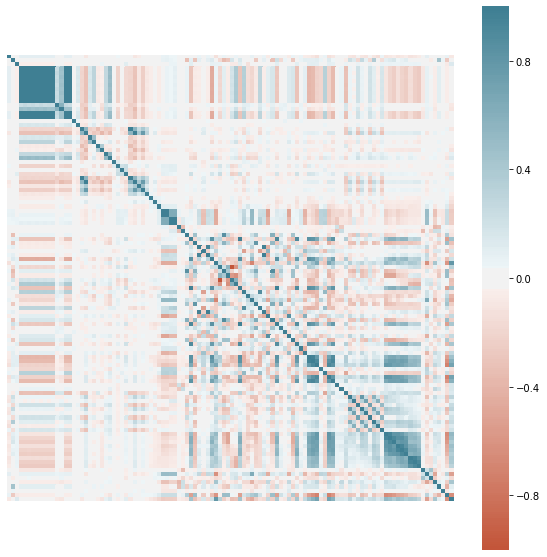

In [9]:
#correlation matrix visualization
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            square=True, xticklabels=False, yticklabels=False);

### Examine pollutant variables

Next, we examined the three pollutant variables. The histograms and the violinplots of the distributions of these variables suggest that ```PM25_Region``` is trimodal, ```Ozone_Region``` may be bimodal, and ```NO2_Region``` may be multimodal. The three distributions do not seem skewed. The histograms and violinplots indicate that the raw distributions of pollutant variables and the distributions of pollutant variables averaged by site are rather similar. The correlation matrix indicates that the three pollutant variables are not strongly correlated with one another, which is consistent with the 3D scatterplot of these variables that does not show clear relationships among the variables. In addition, based on the scatterplot of average pollutant levels over time, the levels of the three pollutants remained constant over the first 10 days of January 2012.

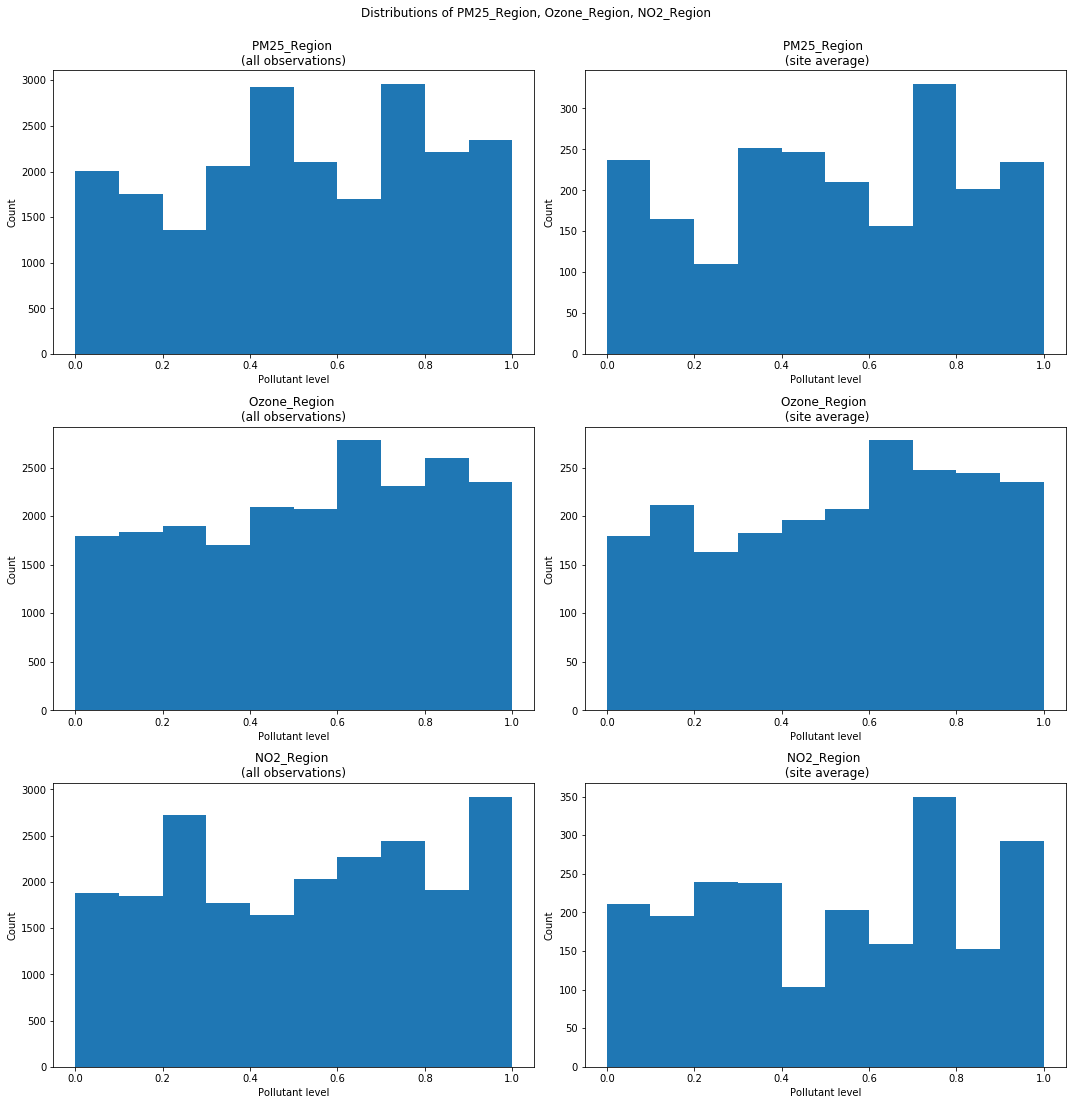

In [10]:
#histograms
fig, ax = plt.subplots(3, 2, figsize = (15, 15))

for i, pollutant in enumerate(['PM25_Region', 'Ozone_Region', 'NO2_Region']):
    ax[i][0].hist(data[pollutant])
    ax[i][0].set_title(f'{pollutant} \n(all observations)')
    ax[i][0].set_xlabel('Pollutant level')
    ax[i][0].set_ylabel('Count')
    
    ax[i][1].hist(data.groupby('site').mean()[pollutant])
    ax[i][1].set_title(f'{pollutant} \n (site average)')
    ax[i][1].set_xlabel('Pollutant level')
    ax[i][1].set_ylabel('Count')

fig.suptitle('Distributions of PM25_Region, Ozone_Region, NO2_Region', y = 1.02)
fig.tight_layout();
    

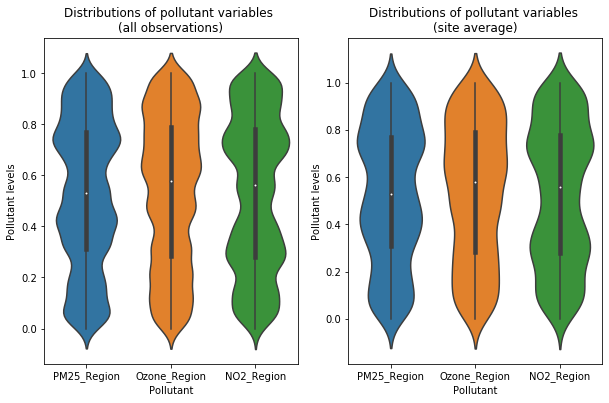

In [11]:
#violin plots

#all observations
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
sns.violinplot(x = 'variable', y = 'value', 
               data = data[['PM25_Region', 'Ozone_Region', 'NO2_Region']].melt(),
              ax=ax[0]);
ax[0].set(xlabel = 'Pollutant', ylabel = 'Pollutant levels', 
          title = 'Distributions of pollutant variables \n(all observations)');

#observations averaged by site
sns.violinplot(x = 'variable', y = 'value', 
               data = data.groupby('site').mean()[['PM25_Region', 'Ozone_Region', 'NO2_Region']].melt(),
               ax=ax[1]);
ax[1].set(xlabel = 'Pollutant', ylabel = 'Pollutant levels', 
          title = 'Distributions of pollutant variables \n(site average)');


In [12]:
#correlation matrix
data[['PM25_Region', 'Ozone_Region', 'NO2_Region']].corr()

PM25_Region  Ozone_Region  NO2_Region
PM25_Region      1.000000      0.079002    0.069612
Ozone_Region     0.079002      1.000000    0.079404
NO2_Region       0.069612      0.079404    1.000000

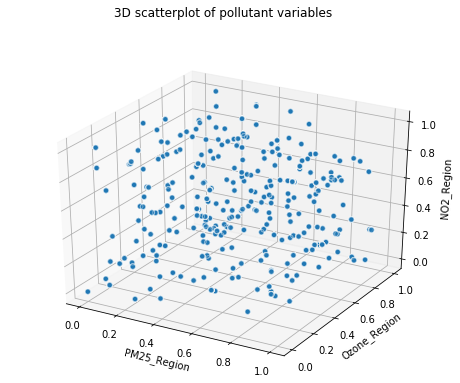

In [13]:
#3D scatterplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = data['PM25_Region']
ys = data['Ozone_Region']
zs = data['NO2_Region']
ax.scatter(xs, ys, zs, s = 30, alpha=0.3, edgecolors='w')

ax.set_xlabel('PM25_Region')
ax.set_ylabel('Ozone_Region')
ax.set_zlabel('NO2_Region')

fig.suptitle('3D scatterplot of pollutant variables');

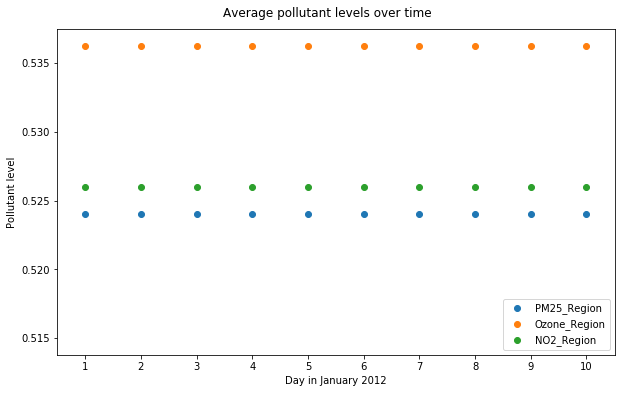

In [42]:
#change in pollutant levels overtime

#on average, each day has the EXACT same pollutant levels
avg_over_time = data.groupby('date').mean()[['PM25_Region', 'Ozone_Region', 'NO2_Region']]

#scatter plot of average pollutant levels over time
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.scatter(range(1, 11), avg_over_time['PM25_Region'], label = 'PM25_Region')
ax.scatter(range(1, 11), avg_over_time['Ozone_Region'], label = 'Ozone_Region')
ax.scatter(range(1, 11), avg_over_time['NO2_Region'], label = 'NO2_Region')

ax.set_xlabel('Day in January 2012')
ax.set_ylabel('Pollutant level')
ax.set_xticks(np.arange(1, 10+1, 1.0))
ax.legend(loc = 'lower right')
fig.suptitle('Average pollutant levels over time', y = 0.93);

### Examine how an area's pollution is affected by pollution of nearby sites

Next we investigated how the an area's pollution is affected by the pollution of nearby sites by examining the relationships between the pollutant variables at a site and the pollutant variables at nearby sites. The correlation matrix and pairwise scatterplots below suggest that the pollutant level at a site and the pollutant level at nearby sites are weakly correlated (for example, ```PM25_Region``` and ```Nearby_Peak2_PM25``` have a correlation of -0.05, ```NO2_Region``` and ```Nearby_Peak2_NO2``` have a correlation of -0.12, and ```Ozone_Region``` and ```Nearby_Peak2_Ozone``` have a correlation of -0.11) and that pollutant levels of nearby sites and lagged pollutant levels of nearby sites are strongly correlated (for example, ```Nearby_Peak2_PM25``` and ```Nearby_Peak2Lag3_PM25``` have a correlation of 0.59, ```Nearby_Peak2_NO2``` and ```Nearby_Peak2Lag3_NO2``` have a correlation of 0.58, and ```Nearby_Peak2_Ozone``` and ```Nearby_Peak2Lag1_Ozone``` have a correlation of 0.71).

In [57]:
#correlation matrix
pollutant_vars = ['PM25_Region', 'Ozone_Region', 'NO2_Region']
nearby_site_vars = ['Nearby_Peak2_NO2', 'Nearby_Peak2_PM25', 'Nearby_Peak2_Ozone', 
                    'Nearby_Peak2Lag1_NO2', 'Nearby_Peak2Lag1_PM25', 'Nearby_Peak2Lag1_Ozone', 
                    'Nearby_Peak2Lag3_NO2', 'Nearby_Peak2Lag3_PM25', 'Nearby_Peak2Lag3_Ozone']
data[pollutant_vars + nearby_site_vars].corr()

PM25_Region  Ozone_Region  NO2_Region  \
PM25_Region                1.000000      0.079002    0.069612   
Ozone_Region               0.079002      1.000000    0.079404   
NO2_Region                 0.069612      0.079404    1.000000   
Nearby_Peak2_NO2          -0.038832      0.084577   -0.120933   
Nearby_Peak2_PM25         -0.051553     -0.004125   -0.009970   
Nearby_Peak2_Ozone         0.058321     -0.114365    0.019803   
Nearby_Peak2Lag1_NO2      -0.028641      0.077126   -0.126417   
Nearby_Peak2Lag1_PM25     -0.040611     -0.010048   -0.016379   
Nearby_Peak2Lag1_Ozone     0.061293     -0.106789    0.028777   
Nearby_Peak2Lag3_NO2      -0.009697      0.072001   -0.120904   
Nearby_Peak2Lag3_PM25     -0.011905     -0.010304   -0.032310   
Nearby_Peak2Lag3_Ozone     0.063359     -0.102693    0.042628   

                        Nearby_Peak2_NO2  Nearby_Peak2_PM25  \
PM25_Region                    -0.038832          -0.051553   
Ozone_Region                    0.084577          -0.004125   
NO2_Region                     -0.120933          -0.009970   
Nearby_Peak2_NO2                1.000000           0.370262   
Nearby_Peak2_PM25               0.370262           1.000000   
Nearby_Peak2_Ozone             -0.245268          -0.227835   
Nearby_Peak2Lag1_NO2            0.784720           0.348132   
Nearby_Peak2Lag1_PM25           0.255210           0.708172   
Nearby_Peak2Lag1_Ozone         -0.249121          -0.208439   
Nearby_Peak2Lag3_NO2            0.581378           0.268989   
Nearby_Peak2Lag3_PM25           0.207963           0.588655   
Nearby_Peak2Lag3_Ozone         -0.230593          -0.127444   

                        Nearby_Peak2_Ozone  Nearby_Peak2Lag1_NO2  \
PM25_Region                       0.058321             -0.028641   
Ozone_Region                     -0.114365              0.077126   
NO2_Region                        0.019803             -0.126417   
Nearby_Peak2_NO2                 -0.245268              0.784720   
Nearby_Peak2_PM25                -0.227835              0.348132   
Nearby_Peak2_Ozone                1.000000             -0.176635   
Nearby_Peak2Lag1_NO2             -0.176635              1.000000   
Nearby_Peak2Lag1_PM25            -0.092928              0.372385   
Nearby_Peak2Lag1_Ozone            0.713416             -0.228003   
Nearby_Peak2Lag3_NO2             -0.139177              0.676695   
Nearby_Peak2Lag3_PM25            -0.095255              0.239539   
Nearby_Peak2Lag3_Ozone            0.515199             -0.231860   

                        Nearby_Peak2Lag1_PM25  Nearby_Peak2Lag1_Ozone  \
PM25_Region                         -0.040611                0.061293   
Ozone_Region                        -0.010048               -0.106789   
NO2_Region                          -0.016379                0.028777   
Nearby_Peak2_NO2                     0.255210               -0.249121   
Nearby_Peak2_PM25                    0.708172               -0.208439   
Nearby_Peak2_Ozone                  -0.092928                0.713416   
Nearby_Peak2Lag1_NO2                 0.372385               -0.228003   
Nearby_Peak2Lag1_PM25                1.000000               -0.186690   
Nearby_Peak2Lag1_Ozone              -0.186690                1.000000   
Nearby_Peak2Lag3_NO2                 0.300842               -0.143858   
Nearby_Peak2Lag3_PM25                0.659119               -0.068041   
Nearby_Peak2Lag3_Ozone              -0.122733                0.568453   

                        Nearby_Peak2Lag3_NO2  Nearby_Peak2Lag3_PM25  \
PM25_Region                        -0.009697              -0.011905   
Ozone_Region                        0.072001              -0.010304   
NO2_Region                         -0.120904              -0.032310   
Nearby_Peak2_NO2                    0.581378               0.207963   
Nearby_Peak2_PM25                   0.268989               0.588655   
Nearby_Peak2_Ozone                 -0.139177              -0.095255   
Nearby_Peak2Lag1_NO2      

In [61]:
#pairwise scatterplots
print('                  Pairwise scatterplots of pollutant variables at a site and nearby sites')
sns.pairplot(data[pollutant_vars + nearby_site_vars]);


                  Pairwise scatterplots of pollutant variables of a site and nearby sites
